# Knowledge Discovery in Databases (KDD) Process

KDD is a more generalized term than data mining. It involves the overall process of discovering useful knowledge from data. The steps involved are:

**Selection**: This step involves selecting the subset of all available data that you want to analyze.

**Preprocessing**: Involves cleaning the data by removing noise and outliers, constructing the necessary data by feature engineering, and integrating all the necessary data.

**Transformation**: This step involves transforming data into a form appropriate to apply data mining procedures.

**Data Mining**: The main step where the algorithms are applied to extract patterns from data.
Interpretation/Evaluation: Here, the patterns produced by the data mining algorithms are evaluated.


##Data Procuring and Understanding

In [1]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset has been uploaded with the name "winequality.csv"
data = pd.read_csv("winequality.csv")

# Initial exploration
print(data.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

## Data Preprocessing

In [2]:
# Handling missing values
data.fillna(data.mean(), inplace=True)  # Filling missing values with mean for simplicity

# Removing duplicates
data.drop_duplicates(inplace=True)

<ipython-input-2-85af6fa6796f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)  # Filling missing values with mean for simplicity


## Data Transformation

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# One-Hot Encoding the 'type' column
data = pd.get_dummies(data, columns=['type'], drop_first=True)

# Excluding the target variable 'quality'
features = data.columns[:-1]

# Standardizing the feature columns
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])


## Data Mining

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Splitting data into training and testing sets
X = data.drop("quality", axis=1)
y = data["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using a Random Forest Regressor for demonstration
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

## Evaluation

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculating the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculating the Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)  # set squared=False to get RMSE

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 0.61
Root Mean Square Error (RMSE): 0.80


## Visualization

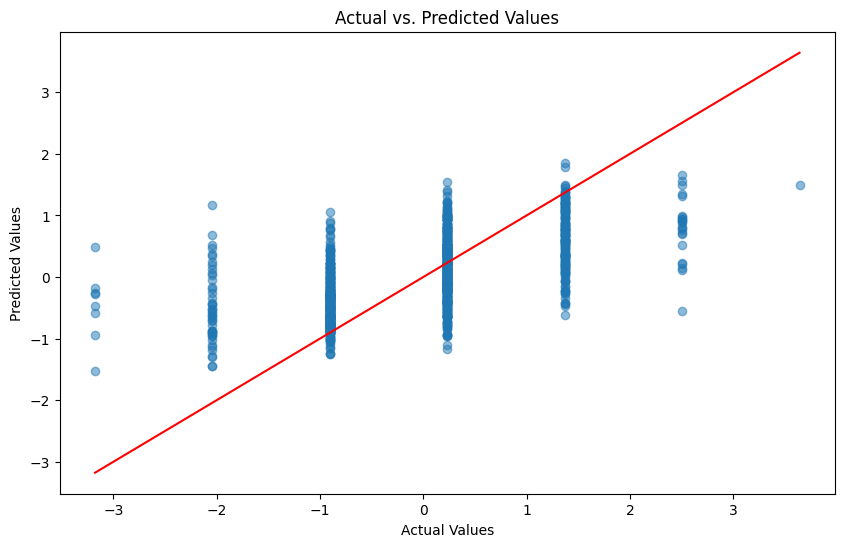

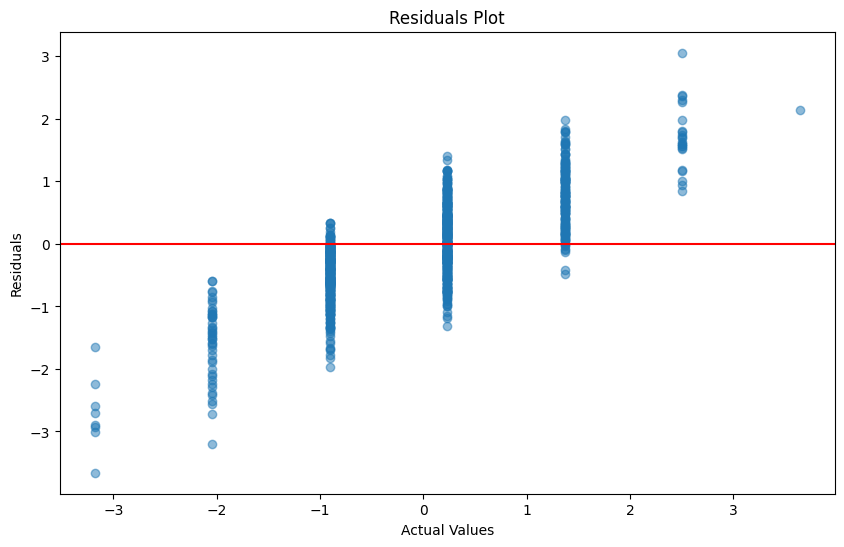

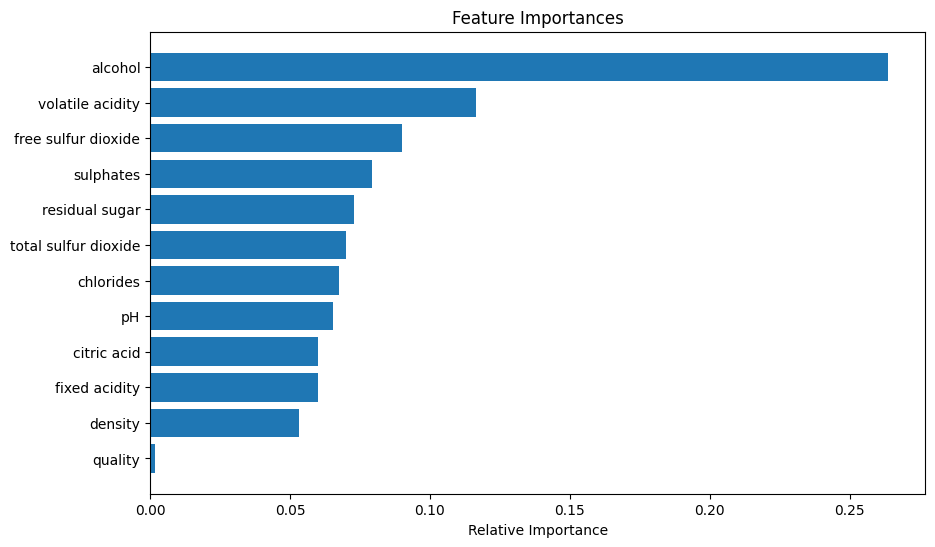

In [12]:
import matplotlib.pyplot as plt

# 1. Actual vs. Predicted Values Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line showing perfect prediction
plt.show()
print()
# 2. Residuals Plot
residuals = y_test - predictions
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='red')
plt.show()
print()
# 3. Feature Importance Plot
importances = regressor.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()